# 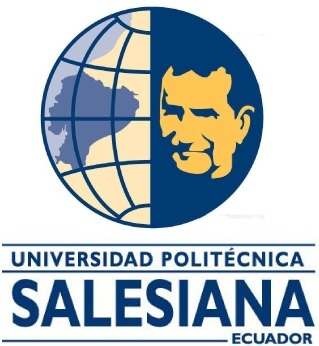

# Proyecto Integrador Final
## Integrantes: 

- Yandry Romero

- Joel Vasquez

Diseñe y desarrolle e implemente en un sistema RPA para el proceso de automatización para escribir contenido en una temática(Seleccionar una temática: tecnología, política, deportiva, social, crónica, finanzas, etc.) 

Para la extracción de datos sobre tecnología los vamos a obtener desde la página oficial de ADSLZone en la cual se obtiene toda la información, posterior a esto se guarda en un archivo txt y luego se realiza un procesamiento de la data para convertir nuestro archivo csv, también luego se realiza un archivo de noticias falsas para poder detectar lenguajes agresivos, spams y fake news

In [1]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
import time

In [2]:
CHROMEDRIVEPATH = 'C:/Users/USUARIO/Downloads/chromedriver'
WINDOW_SIZE = '1366,768'
chrome_options = Options()
chrome_options.add_argument('--window-size=%s'%WINDOW_SIZE)


driver = webdriver.Chrome(executable_path=CHROMEDRIVEPATH,chrome_options = chrome_options)
driver.get('https://www.adslzone.net/')
print(driver.title)

wait=driver.implicitly_wait(5) # seconds

texto = driver.find_elements_by_class_name('news-item')
print("Elementos Obtenidos")

<ipython-input-2-6629a9dc89c1>:7: DeprecationWarning: use options instead of chrome_options
  driver = webdriver.Chrome(executable_path=CHROMEDRIVEPATH,chrome_options = chrome_options)


ADSLZone: noticias, foros y tutoriales sobre tecnología, fibra óptica y operadores
Elementos Obtenidos


In [3]:
mi_path = 'C:/Users/USUARIO/Downloads/documento.txt'
f = open(mi_path, 'a+')
for item in texto:
    if(len(item.text)>200):
        f.write(item.text)
        print(item.text)

Fintech
En 2 días se actualiza la criptomoneda Ethereum y cambiarán muchas cosas
03 de agosto, 2021 • 18:18
David Parra
Las criptomonedas son algo que a día de hoy siguen sorprendiendo a mucha gente. Desde su nacimiento desde hace varios años, esta forma de dinero electrónico ha ido alcanzando poco a poco mucha popularidad hasta convertirse hoy en día en una forma de pago para muchos negocios. Además, también es una forma de inversión para ganar muchísimo dinero tanto al corto como al largo plazo. Cualquier persona puede comprar Bitcoin u otras criptomonedas. Aunque la criptomoneda más famosa sea el Bitcoin, también hay muchas otras de gran valor. Aun así, hay que saber cómo funciona todo lo que rodea a este mundillo, ya que igual que te puedes beneficiar, también puedes salir perjudicado y perder mucho dinero. Otra de las criptomonedas más populares, Ethereum, va a sufrir unos cambios este mismo jueves.
Leer más
Patinetes
Todo lo que necesitar saber sobre los patinetes eléctricos y su

Parte B:

•	Por otro lado, debe ser suficientemente inteligente como para filtrar el contenido repetido para evitar spams (similitud de textos) innecesarios y fake news.

◦	Para este ultimo una de las actividades el poder identificar noticias falsas a partir de un análisis automático tanto del lenguaje utilizado, como de las emociones que subyacen a ese texto. Para ello, es capaz de discernir emociones básicas como el miedo, la ira o la sorpresa y detectar también lenguaje agresivo y mensajes de odio en los medios sociales de comunicación que se basa en proponer un enfoque terminológico, extrayendo términos y patrones lingüísticos de odio a partir de conjuntos de datos analizados anteriormente y monitorizar sistemáticamente para detectar noticias falsas.

◦	Otro parámetro  es a «la relación entre el titular y el cuerpo de la noticia», es decir, a que concuerden, por ejemplo de noticias con bastantes probabilidades de ser falsas «cualquiera que tenga interrogaciones o palabras malsonantes en su titulo». Sin embargo, también reconoce que «puede haber informaciones que tengan pinta de falsas por el titular y luego su credibilidad aumente porque tengan fuentes y estas sean comprobables (Relación del titulo con el cuerpo de la noticia). 

In [22]:
import pandas as pd
from sklearn.utils import shuffle
import string
import nltk
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk import tokenize
import seaborn as sns
from sklearn import metrics
import itertools
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import accuracy_score
import numpy as np

In [43]:
falso = pd.read_csv ("Datos/Fake.csv", encoding='utf-8', sep=';') 
verdadero = pd.read_csv ("Datos/News.csv", encoding='utf-8', sep=';') 
verdadero.head()

Autor                                               Text
0          Fintech  En 2 días se actualiza la criptomoneda Ethereu...
1     David Parra   Las criptomonedas son algo que a día de hoy si...
2  Jorge Majdalani  Uno de los métodos de transporte preferidos so...
3      David Parra  La Inteligencia Artificial es un sistema que e...
4     Iker Serrano  Quieres contratar el servicio de Internet con ...

In [44]:
falso['target'] = 'fake'
verdadero['target'] = 'true'

In [45]:
data = pd.concat([falso, verdadero]).reset_index(drop = True)

In [46]:
from sklearn.utils import shuffle
data = shuffle(data)
data = data.reset_index(drop=True)

In [47]:
data['Text'] = data['Text'].apply(lambda x: x.lower())

In [48]:
def punctuation_removal(text):
    all_list = [char for char in text if char not in string.punctuation]
    clean_str = ''.join(all_list)
    return clean_str
data['Text'] = data['Text'].apply(punctuation_removal)

In [49]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('spanish')
data['Text'] = data['Text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USUARIO\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Autor
Claudio Valero      4
David Parra        10
David Parra         2
Fintech             2
Iker Serrano        2
Iván Martín         4
Jorge Majdalani    10
Name: Text, dtype: int64


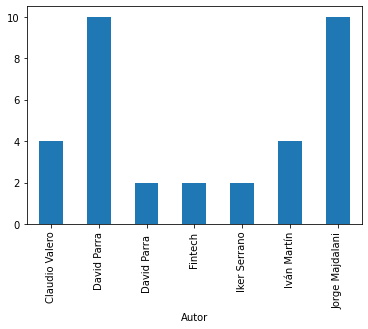

In [50]:
print(data.groupby(['Autor'])['Text'].count())
data.groupby(['Autor'])['Text'].count().plot(kind="bar")
plt.show()

target
fake    17
true    17
Name: Text, dtype: int64


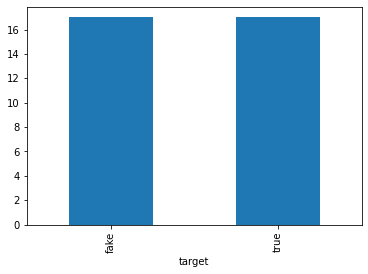

In [51]:
print(data.groupby(['target'])['Text'].count())
data.groupby(['target'])['Text'].count().plot(kind='bar')
plt.show()

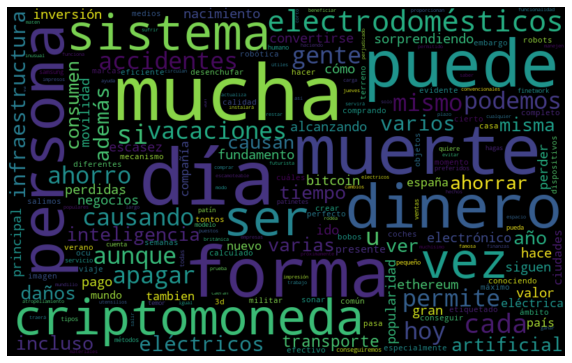

In [52]:
fake_data = data[data["target"] == "fake"]
all_words = ' '.join([text for text in fake_data.Text])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

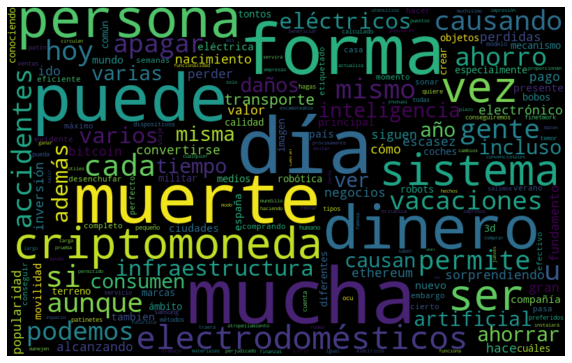

In [53]:
real_data = data[data["target"] == "true"]
all_words = ' '.join([text for text in fake_data.Text])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [54]:
token_space = tokenize.WhitespaceTokenizer()
def counter(text, column_text, quantity):
    all_words = ' '.join([text for text in text[column_text]])
    token_phrase = token_space.tokenize(all_words)
    frequency = nltk.FreqDist(token_phrase)
    df_frequency = pd.DataFrame({"Word": list(frequency.keys()),
                                   "Frequency": list(frequency.values())})
    df_frequency = df_frequency.nlargest(columns = "Frequency", n = quantity)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequency, x = "Word", y = "Frequency", color = 'blue')
    ax.set(ylabel = "Count")
    plt.xticks(rotation='vertical')
    plt.show()

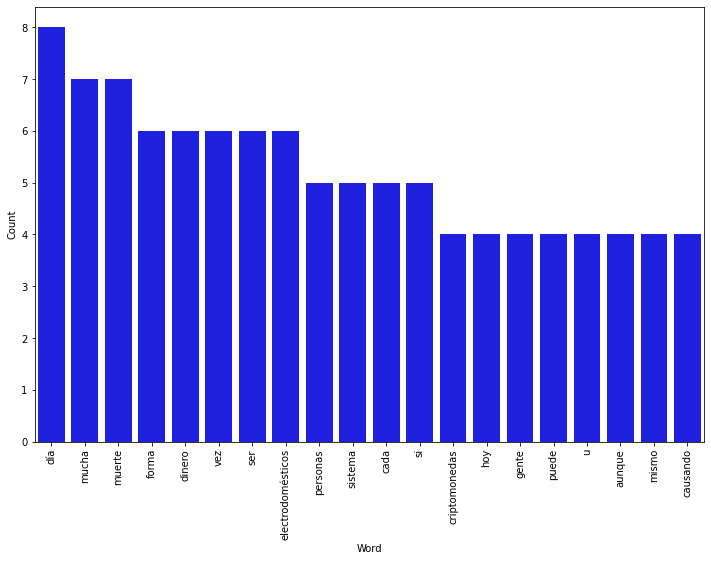

In [55]:
counter(data[data['target'] == 'fake'], 'Text', 20)

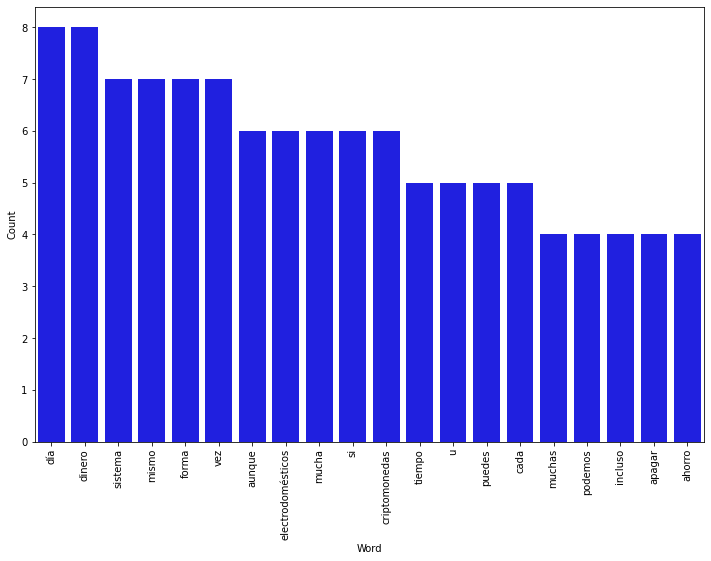

In [56]:
counter(data[data['target'] == 'true'], 'Text', 20)

In [57]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [58]:
X_train,X_test,y_train,y_test = train_test_split(data['Text'], data.target, test_size=0.2, random_state=42)

In [59]:
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', LogisticRegression())])
# Fitting the model
model = pipe.fit(X_train, y_train)
# Accuracy
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 28.57%


Confusion matrix, without normalization


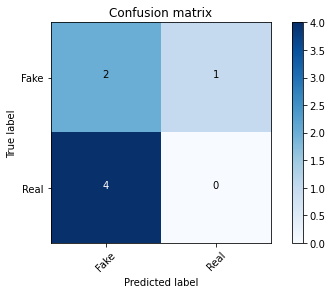

In [60]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

## Decision Tree Classifier

In [61]:
from sklearn.tree import DecisionTreeClassifier

# Vectorizing and applying TF-IDF
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', DecisionTreeClassifier(criterion= 'entropy',
                                           max_depth = 20, 
                                           splitter='best', 
                                           random_state=42))])
# Fitting the model
model = pipe.fit(X_train, y_train)

# Accuracy
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 71.43%


Confusion matrix, without normalization


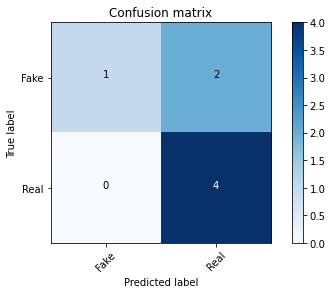

In [62]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

## Conclusiones 

- Los sistemas RPA para automatizar procesos son muy utiles para analizar la información y poder automatizar procesos, en la actualidad la automtización de procesos esta reemplazando procesos que eran muy demorados de realizar por los humanos por lo que esto esta contribuyendo agilizando las tareas y disminuyendo el tiempo de realzación. 

- El scrapping es muy util para obtener información de sitios, redes sociales entre otros para luego analizar a través de difernetes procesos y poder realziar tareas automatizadas como escribir textos o en este caso poder obtener noticias sobre tecnología y poder usar para presentar a través de nuestros medios o artículos las noticias más reciente proporcionadas por el sitio web antes mencionado.

## Recomendaciones

- Buscar información en sitios o redes sociales que sean confiables y de la misma manera crear un texto de noticias falsas para que nuestro algoritmo lo detecte y así pueda sernir la información y presentar solo información verificada. 

## Bibliografia

https://www.adslzone.net/

https://towardsdatascience.com/detecting-fake-news-with-and-without-code-dd330ed449d9